### Page 3

In [138]:
from skimage import color, io
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
from skimage.morphology import erosion, dilation, binary_erosion, binary_dilation
from skimage.morphology import disk
from skimage import segmentation
from skimage import measure
from scipy.stats import norm
from scipy.spatial import distance
import math

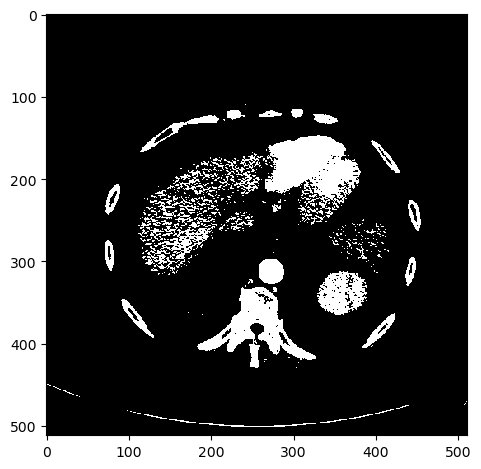

In [139]:
in_dir = "data/"
ct = dicom.read_file(in_dir + '1-442.dcm')
img = ct.pixel_array
bin_img = img > 90

io.imshow(bin_img, cmap='gray')

c:\Users\matth\anaconda3\envs\course02502\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


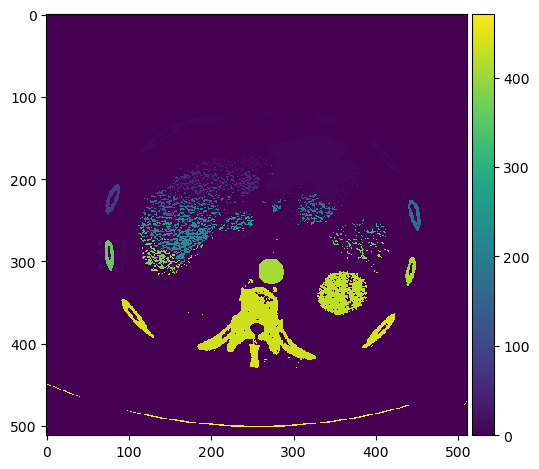

In [140]:
label_img = measure.label(bin_img)
region_props = measure.regionprops(label_img)
io.imshow(label_img)

In [141]:
def f_circ(A, P):
    if P == 0: return 0
    else:
        return 4 * np.pi * A / (P ** 2)


440.4375


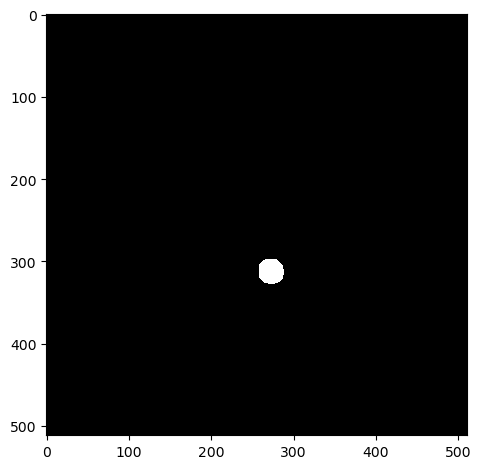

In [142]:
min_circ = 0.9
min_area = 200

# Create a copy of the label_img
label_img_filter = label_img.copy()
for region in region_props:
    circularity = f_circ(region.area, region.perimeter)

    # Find the areas that do not fit our criteria
    if ((region.area < min_area) or (circularity < min_circ)):
        # set the pixels in the invalid areas to background
        for cords in region.coords:
            label_img_filter[cords[0], cords[1]] = 0
    else:
        print(region.area * (0.75 ** 2))

# Create binary image from the filtered label image
i_area = label_img_filter > 0
io.imshow(i_area)

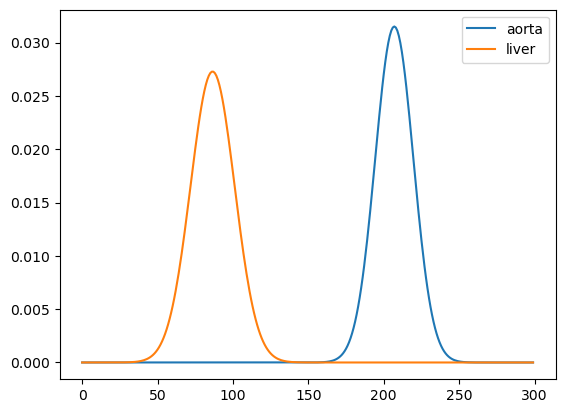

In [143]:
hu_range = np.arange(0, 300, 1.0)

aorta_mask = io.imread(in_dir + 'AortaROI.png') > 0
aorta_values = img[aorta_mask]

liver_mask = io.imread(in_dir + 'LiverROI.png') > 0
liver_values = img[liver_mask]

(mu_aorta, std_aorta) = norm.fit(aorta_values)
(mu_liver, std_liver) = norm.fit(liver_values)

pdf_aorta = norm.pdf(hu_range, mu_aorta, std_aorta)
pdf_liver = norm.pdf(hu_range, mu_liver, std_liver)

plt.plot(hu_range, pdf_aorta, label='aorta')
plt.plot(hu_range, pdf_liver, label='liver')
plt.legend()
plt.show()

In [144]:
idx = np.argwhere(np.diff(np.sign(pdf_liver - pdf_aorta)))
t = hu_range[idx[0][0]]
print(t)
print(mu_aorta, std_aorta)

150.0
206.99287410926365 12.658963440876713


In [145]:
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage.transform import matrix_transform

In [146]:
# angle in radians - counter clockwise
rotation_angle = 20.0 * math.pi / 180.
trans = [3.1, -3.3]
scale_factor = 2.0
s_tform = SimilarityTransform(rotation=rotation_angle, translation=trans, scale=scale_factor)
print(s_tform.params)

[[ 1.87938524 -0.68404029  3.1       ]
 [ 0.68404029  1.87938524 -3.3       ]
 [ 0.          0.          1.        ]]


In [147]:
point = [10, 10]
point_tform = matrix_transform(point, s_tform.params)
point_tform

array([[15.05344955, 22.33425528]])

In [148]:
(25 + 52) / 2

38.5

In [149]:
from scipy.stats import norm
from scipy.spatial import distance

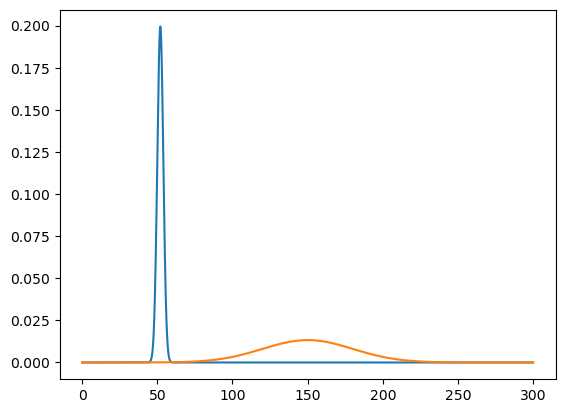

In [150]:
x = np.arange(0, 300, 0.1)
pdf_med = norm.pdf(x, 52, 2.0)
pdf_high = norm.pdf(x, 150, 30.0)

plt.plot(x, pdf_med)
plt.plot(x, pdf_high)

In [151]:
idx = np.argwhere(np.diff(np.sign(pdf_high - pdf_med)))
x[idx[1][0]]
#t = hu_range[idx[0][0]]

59.6

In [152]:
M = [[177, 195, 181, 30, 192],
     [258, 380, 222, 157, 95],
     [500, 270, 227, 340, 224],
     [279, 352, 400, 311, 402],
     [391, 393, 478, 460, 538]]

vals = [391, 279, 270, 222, 30]

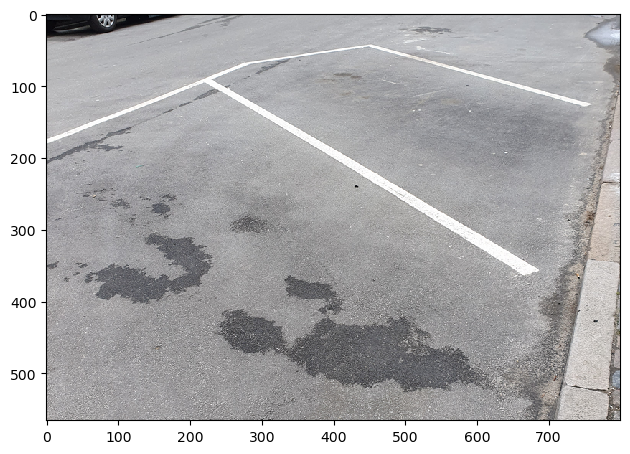

In [153]:
im_road = io.imread(in_dir + 'road.png')
io.imshow(im_road)

In [154]:
from skimage.color import rgb2hsv
from skimage.util import img_as_float
from skimage.util import img_as_ubyte

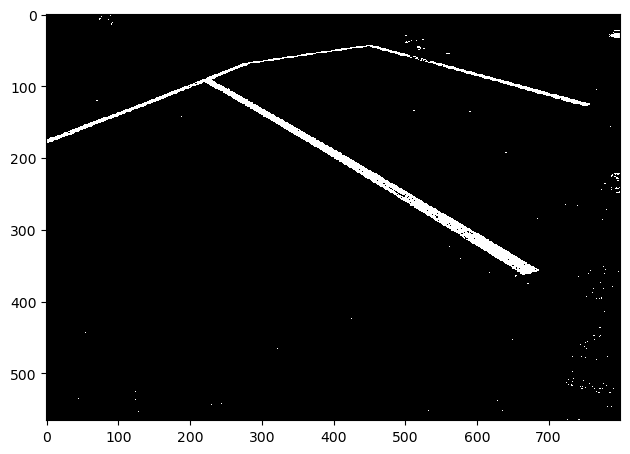

In [155]:
hsv_img = (rgb2hsv(im_road))
value_img = hsv_img[:, :, 2]
bin_val = value_img > 0.9
io.imshow(bin_val)

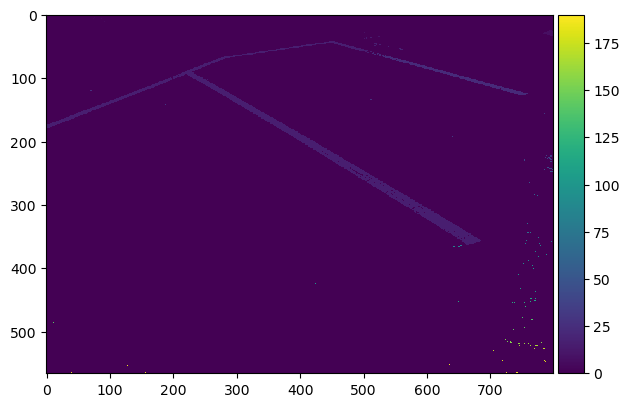

In [156]:
label_road = measure.label(bin_val)
region_props_road = measure.regionprops(label_road)
io.imshow(label_road)

In [157]:
areas = np.array([prop.area for prop in region_props_road])
np.sort(areas)[::-1]

array([8158, 1047,   84,   22,   16,   14,   11,    9,    9,    8,    8,
          6,    6,    6,    5,    4,    4,    4,    4,    4,    3,    3,
          3,    3,    3,    3,    3,    3,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,   

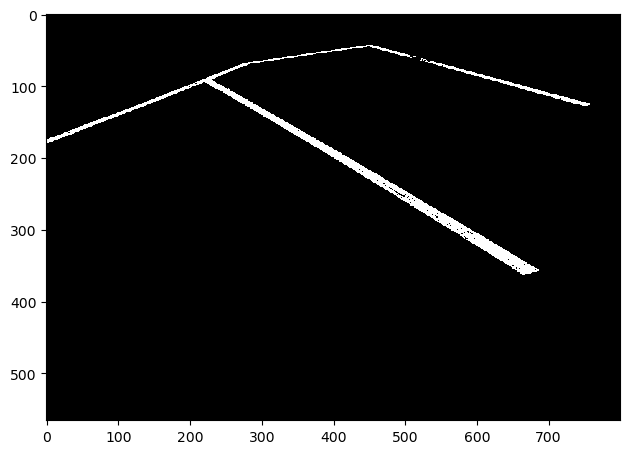

In [158]:
min_area = 500

# Create a copy of the label_img
label_img_filter = label_road.copy()
for region in region_props_road:
	# Find the areas that do not fit our criteria
	if region.area < min_area:
		# set the pixels in the invalid areas to background
		for cords in region.coords:
			label_img_filter[cords[0], cords[1]] = 0
# Create binary image from the filtered label image
i_area = label_img_filter > 0
io.imshow(i_area)

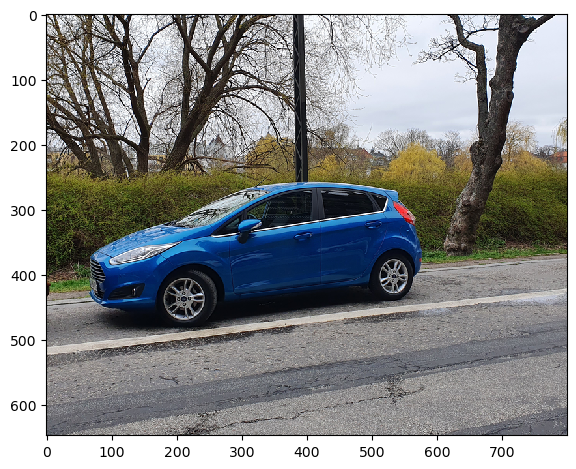

In [159]:
im_car = io.imread(in_dir + 'car.png')
io.imshow(im_car)

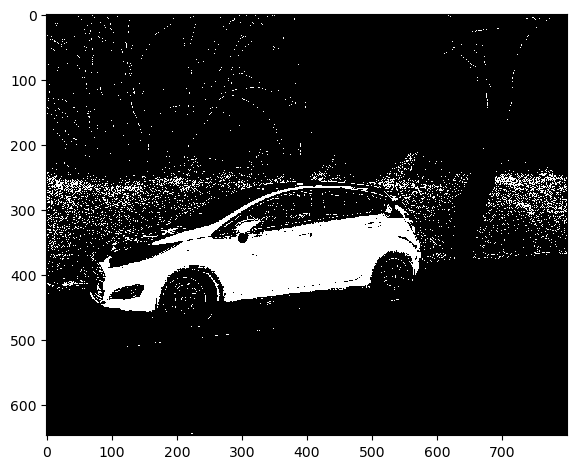

In [160]:
hsv_img = (rgb2hsv(im_car))
sat_img = hsv_img[:, :, 1]
s_mask = sat_img > 0.7
io.imshow(s_mask)

31365

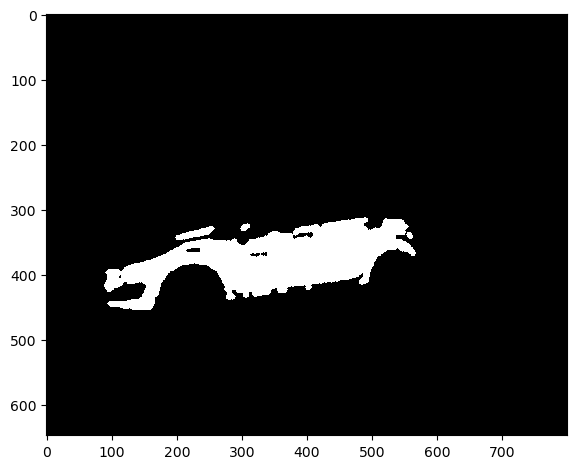

In [161]:
eroded = erosion(s_mask, disk(6))
dilated = dilation(eroded, disk(4))
io.imshow(dilated)
np.count_nonzero(dilated)

In [162]:
(-13/27)*np.log2(13/27) + (-14/27)*np.log2(14/27)

0.9990102708804813